In [13]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv("PastHires.csv")
data

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [3]:
data.replace(['Y','N'],[1,0],inplace=True)
data.replace(['BS','MS','PhD'],[0,1,2],inplace=True)


In [4]:
data


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


In [5]:
x=data.iloc[:,:6].values
y=data.iloc[:,6].values

In [6]:
classif=tree.DecisionTreeClassifier()
classif.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(797.1428571428571, 391.392, 'Employed? <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(637.7142857142857, 304.416, 'Interned <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(478.2857142857142, 217.44, 'Years Experience <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(318.85714285714283, 130.464, 'Level of Education <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(159.42857142857142, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(478.2857142857142, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(637.7142857142857, 130.464, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(797.1428571428571, 217.44, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(956.5714285714284, 304.416, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

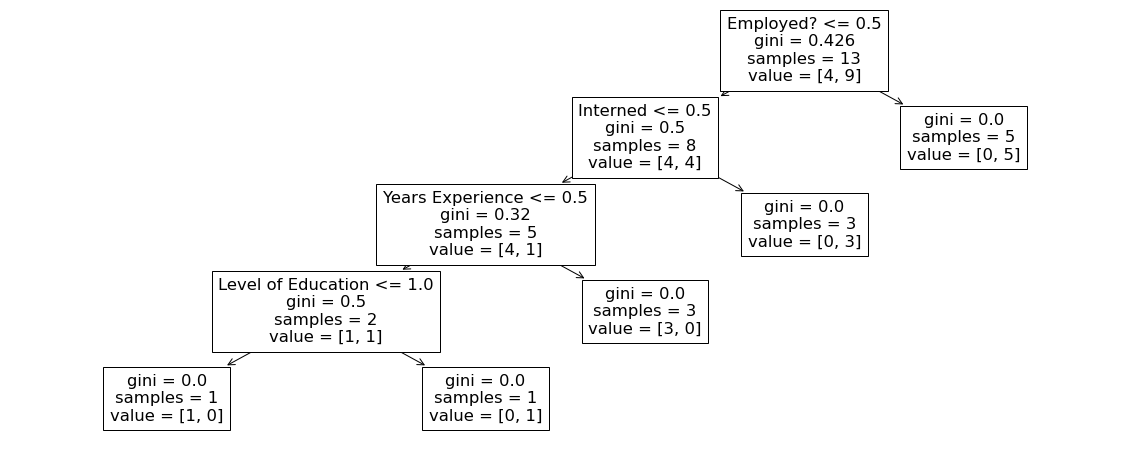

In [14]:
plt.figure(figsize=(20,8))
tree.plot_tree(classif,feature_names=list(data.columns[:6]))

In [21]:
y_pred=classif.predict(x)
dataframe={"actual":y.flatten(),"predicted":y_pred.flatten()}
a=pd.DataFrame(dataframe)
a

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


In [28]:
#prediction for employed 2 years exp and interned candiate
classif.predict([[2,1,3,1,0,1]])

array([1], dtype=int64)

In [27]:
classif.predict([[0,0,3,1,0,0]])

array([0], dtype=int64)

In [29]:
import sklearn.metrics as mt
print("R2_Score : ",(mt.r2_score(y, y_pred)))

R2_Score :  1.0
